### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

2024-10-15 23:37:09.147529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 23:37:09.179084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 23:37:09.188328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 23:37:09.207375: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-15 23:37:10.830481: W tensorflow/compiler/tf2

### Load the drive

In [2]:
file_path = '../../0_assets/datasets/diabetes.csv'

### Make the dataframe

In [3]:
df = pd.read_csv(file_path)

In [4]:
print(f'With:    {len(df[df['Outcome']==1])}')
print(f'Without: {len(df[df['Outcome']==0])}')

With:    268
Without: 500


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
list(df.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

### Visualize the data

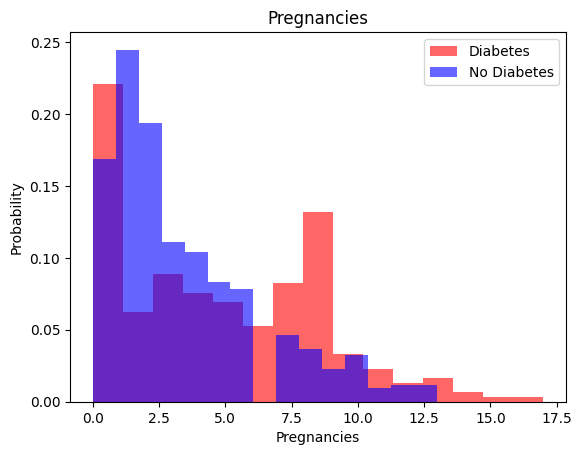

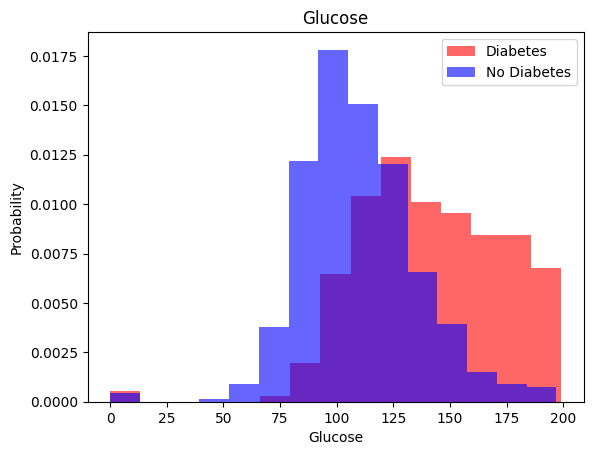

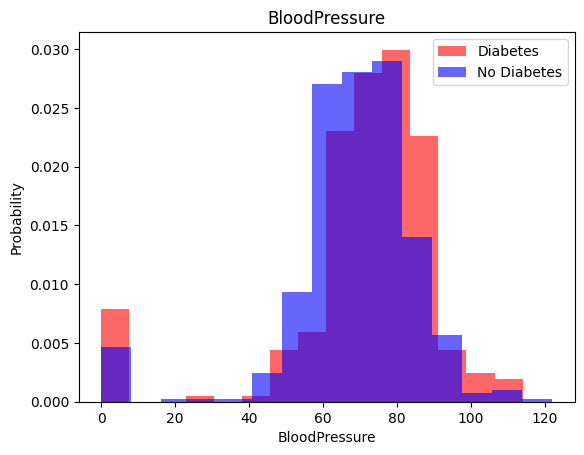

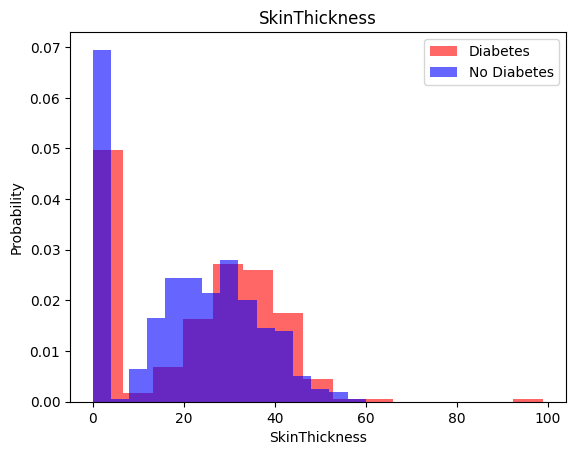

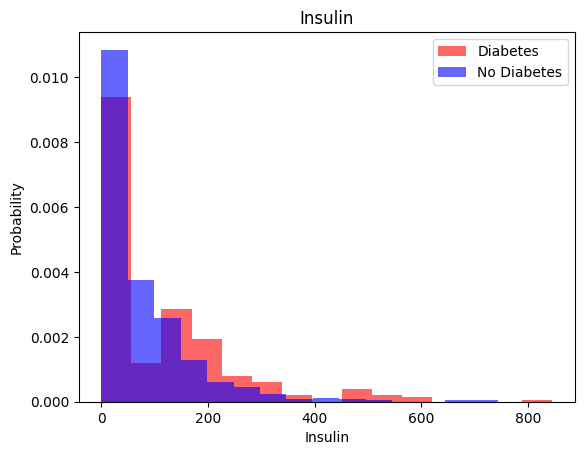

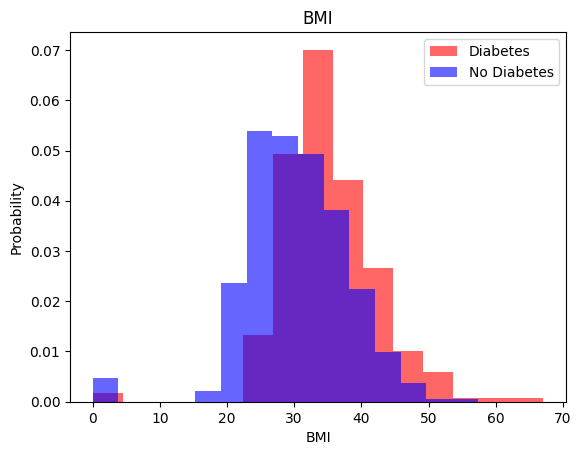

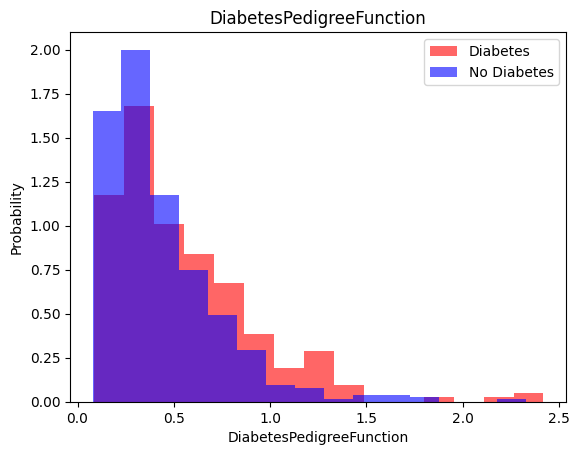

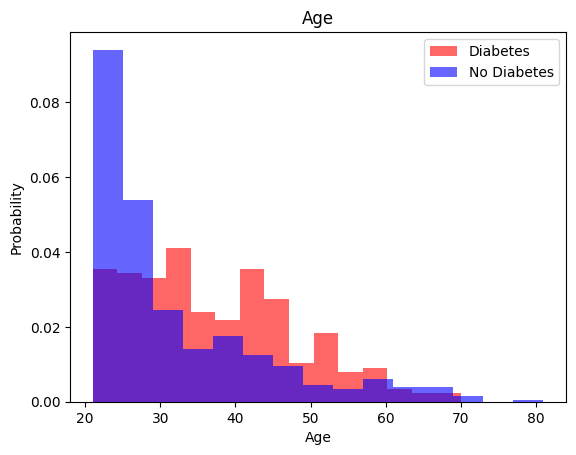

In [7]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='red', label='Diabetes', density=True, bins=15, alpha=0.6)
  plt.hist(df[df['Outcome']==0][label], color='blue', label='No Diabetes', density=True, bins=15, alpha=0.6)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [8]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [9]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### Scalling
The data is in different  ranges and this usually affects the model accuracy hence the scaling into the same range

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Reshape the data

In [12]:
X.shape, y.shape

((768, 8), (768,))

In [13]:
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

### Visual the scaled data

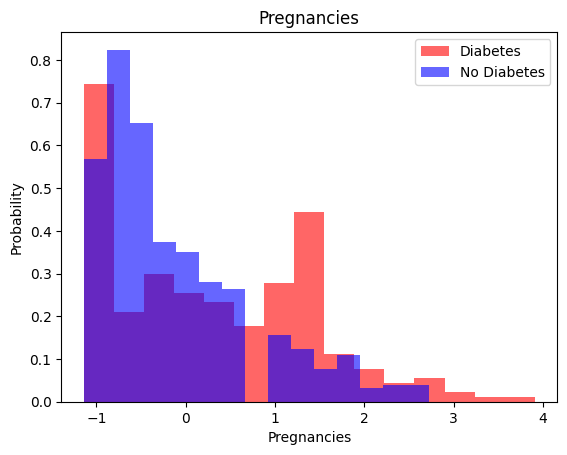

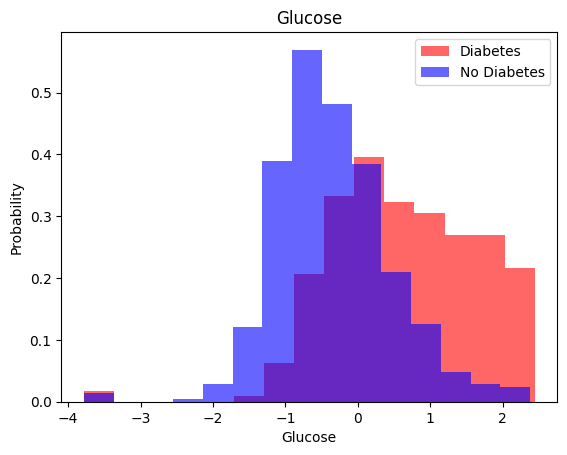

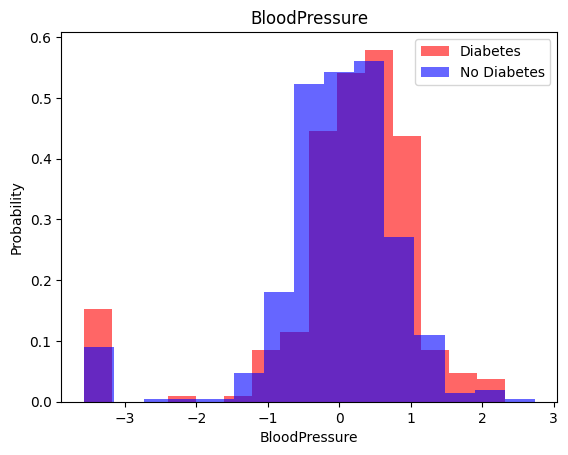

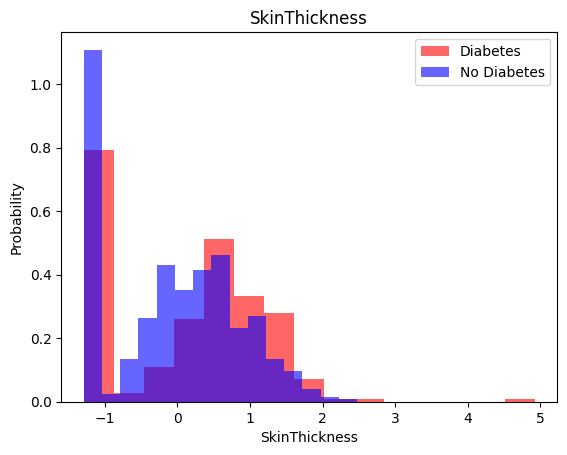

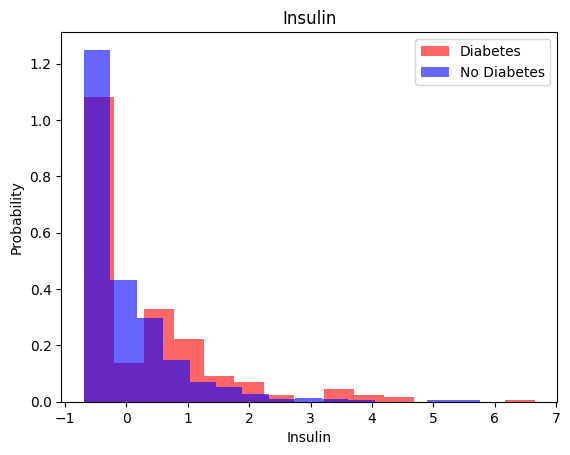

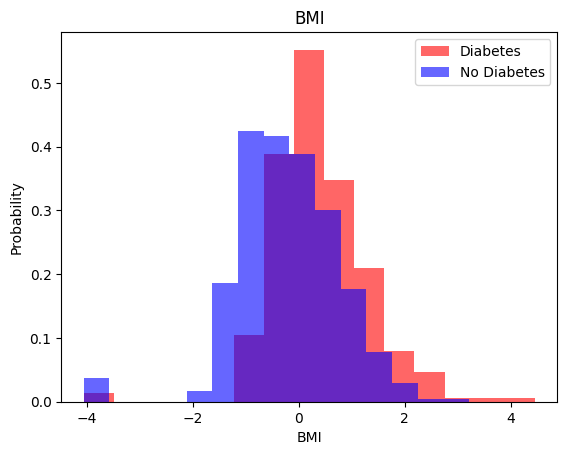

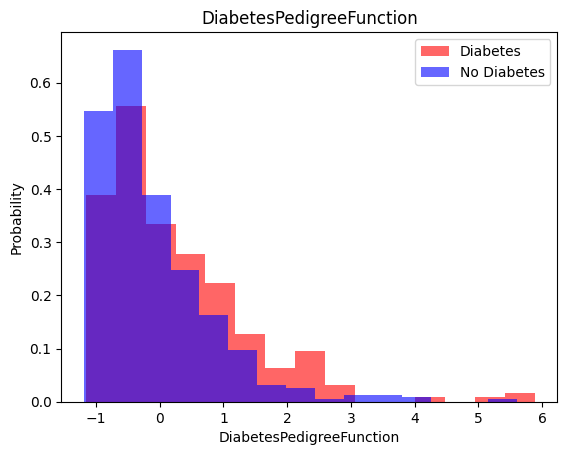

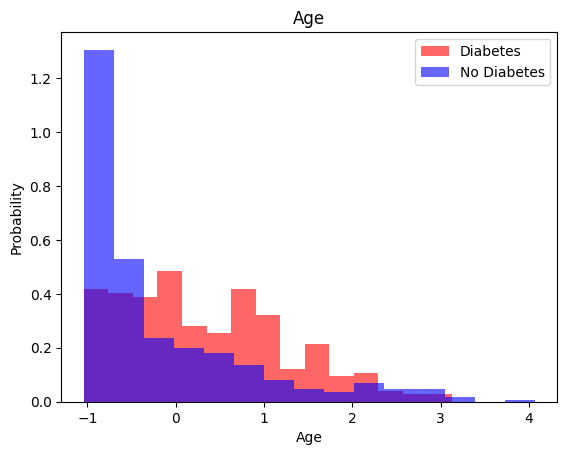

In [14]:
for i in range(len(transformed_df.columns[:-1])):
  label = transformed_df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='red', label='Diabetes', density=True, bins=15, alpha=0.6)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='blue', label='No Diabetes', density=True, bins=15, alpha=0.6)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

### Resampling data to match the output numbers

In [15]:
len(transformed_df[transformed_df['Outcome']==0]), len(transformed_df[transformed_df['Outcome']==1])

(500, 268)

In [16]:
over = RandomOverSampler()
X, y =over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [17]:
len(transformed_df[transformed_df['Outcome']==0]), len(transformed_df[transformed_df['Outcome']==1])

(500, 500)

### Spliting data

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=13)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)

### Making a model

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


# train a model

In [20]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5188 - loss: 0.6880 - val_accuracy: 0.6050 - val_loss: 0.6575
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5855 - loss: 0.6505 - val_accuracy: 0.6450 - val_loss: 0.6397
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6836 - loss: 0.6297 - val_accuracy: 0.6700 - val_loss: 0.6211
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7381 - loss: 0.5828 - val_accuracy: 0.6750 - val_loss: 0.6052
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7229 - loss: 0.5814 - val_accuracy: 0.6750 - val_loss: 0.5921
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7062 - loss: 0.5808 - val_accuracy: 0.6750 - val_loss: 0.5824
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7360 - loss: 0.5461 - val_accuracy: 0.6750 - val_loss: 0.5718
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.5586 - val_accuracy: 0.6800 

In [21]:
model.evaluate(X_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8865 - loss: 0.2928


[0.31206274032592773, 0.8700000047683716]